## Gathering

In [1]:
# Loading packages
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


In [2]:
df1=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df1.tweet_id=df1.expanded_urls.str.extract('(\d{18})')
df1.tweet_id[0:5]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: object

In [4]:
# Downloading tsv file and reading the file
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
   
images = pd.read_csv('image_predictions.tsv', sep='\t')

In [5]:
df_3 = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet_json') as f:
    for line in f:
        status  = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        df_3 = df_3.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'retweet_count', 'favorite_count']))
df_3 = df_3.reset_index(drop=True)
df_3

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


## Assessing

In [6]:
df_3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [7]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [37]:
#Making a copy of each df
df1_clean=df1.copy()
img_clean=images.copy()
df3_clean=df_3.copy()

In [10]:
df1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
img_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Cleaning
### These issues will be addressed:
Quality Issues
- Get rid of  in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, 
retweeted_status_timestamp
- Change imgclean tweet id to string
- Change df1clean timestamp to datetime
- Change df3cleen retweet count and favorite count to int
- Remove rows without images
- Rating denominator doesn't make sense to keep it, doesn't make sense mathematically
- Delete rows with non-names
- Change column headings
- Delete rows for outliers from the Rating variable

Tidiness issues
- Combined all the dog type columns
- Combined df1_clean img_clean and df3_clean


In [12]:
# Getting rid of columns that I will not be using for this analysis
df1_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [13]:
# Changing datatypes 
img_clean['tweet_id'] = img_clean['tweet_id'].astype(str)
df1_clean['timestamp'] =  pd.to_datetime(df1_clean['timestamp'])
df3_clean['retweet_count'] = df3_clean['retweet_count'].astype(int)
df3_clean['favorite_count'] = df3_clean['favorite_count'].astype(int)

In [14]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [15]:
#cleaning up the several rows of dog type
dogtype = []
conf= []

def type_conf(row):
    if row['p1_dog']:
        dogtype.append(row['p1'])
        conf.append(row['p1_conf'])
    elif row['p2_dog']:
        dogtype.append(row['p2'])
        conf.append(row['p2_conf'])
    elif row['p3_dog']:
        dogtype.append(row['p3'])
        conf.append(row['p3_conf'])
    else:
        dogtype.append('Unidentifiable')
        conf.append(0)

img_clean.apply(type_conf, axis = 1)

img_clean['breed'] = dogtype
img_clean['confidence'] = conf

#dropping now unnecessary columns
img_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',], axis=1, inplace=True)

In [16]:
#getting rid of rating_denominator
df1_clean.drop(['rating_denominator'], axis=1, inplace=True)

In [17]:
df1_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,None,None,None


In [18]:
#deleting rows without an image
img_clean = img_clean.dropna(subset=['jpg_url'])

In [19]:
#making sure all rows without images were deleted
sum(img_clean['jpg_url'].isnull())

0

In [21]:
df = pd.merge(df1_clean, img_clean, on = 'tweet_id', how = 'inner')
df = pd.merge(df, df3_clean, on = 'tweet_id', how = 'inner')

In [22]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,breed,confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Unidentifiable,0.000000,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6514,33819
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4328,25461
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,9774,41048


In [45]:
df.rename(index=str, columns={"tweet_id": "Tweet ID", "timestamp": "Timestamp","source":"Source", "text":"Text", 
                                     "expanded_urls":"URL", "rating_numerator":"Rating","name":"Name", "jpg_url":"Image URL", 
                                     "img_num":"Image Num", "breed":"Dog Type","confidence":"Confidence", 
                                     "retweet_count":"Retweets", "favorite_count":"Favorites"}, inplace=True)

In [32]:
#Removing rows with non-names 
df= df.drop(df[df.Name == "a"].index)
df= df.drop(df[df.Name == "None"].index)
df= df.drop(df[df.Name == "an"].index)
df= df.drop(df[df.Name == "the"].index)
df= df.drop(df[df.Name == "very"].index)
df= df.drop(df[df.Name == "his"].index)
df= df.drop(df[df.Name =="just"].index)
df= df.drop(df[df.Name == "quite"].index)
df= df.drop(df[df.Name == "0"].index)
df= df.drop(df[df.Name =="my"].index)
df= df.drop(df[df.Name == "by"].index)


In [33]:
#Checking what names comes up that aren't actually a name
df['Name'].value_counts()

Charlie       12
Cooper        11
Oliver        11
Lucy          10
Tucker        10
Penny         10
Bo             9
Winston        9
Lola           9
Sadie          8
Toby           7
Buddy          7
Daisy          7
Scout          6
Stanley        6
Bella          6
Jax            6
Koda           6
Jack           6
Dave           6
Rusty          6
Milo           6
Bailey         6
Leo            6
Gus            5
George         5
Chester        5
Alfie          5
Finn           5
Phil           5
              ..
Pubert         1
Marvin         1
Raphael        1
Creg           1
Chesterson     1
Napolean       1
Dale           1
Severus        1
Kane           1
Jed            1
Evy            1
Lolo           1
Fred           1
Charleson      1
Dido           1
Socks          1
Huck           1
Halo           1
Puff           1
Dot            1
Brooks         1
DayZ           1
Lizzie         1
Craig          1
Shadoe         1
Lenox          1
Swagger        1
Pancake       

In [47]:
#deleting rows with outliers
df= df.drop(df[df.Rating > 20].index)

## Store

In [38]:
# Save clean DataFrame to csv file
df.to_csv('twitter_master.csv')

## Analyze

In [50]:
df.describe()

,Rating,Image Num,Confidence,Retweets,Favorites
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,10.776109,1.212969,0.490194,3151.059386,10438.822526
std,1.900274,0.579449,0.336181,4618.006248,12913.996232
min,2.000000,1.000000,0.000000,23.000000,107.000000
25%,10.000000,1.000000,0.187155,765.000000,2499.000000
50%,11.000000,1.000000,0.491022,1744.000000,5749.000000
75%,12.000000,1.000000,0.804177,3811.000000,14025.000000
max,14.000000,4.000000,0.999953,56625.000000,107956.000000


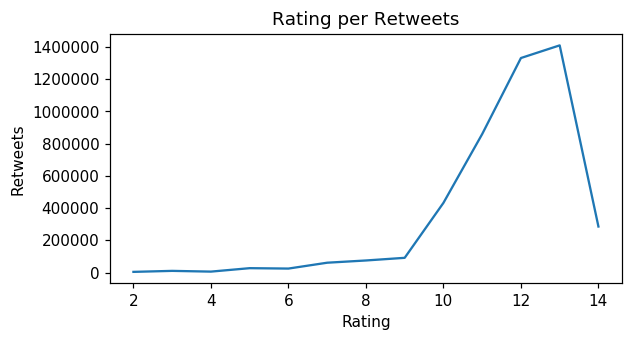

In [48]:
rating_rt = df.groupby('Rating')['Retweets'].sum()
plt.figure(figsize=(6,3), dpi = 110)
plt.xlabel('Rating', fontsize = 10)
plt.ylabel('Retweets', fontsize = 10)
plt.title('Rating per Retweets')
plt.plot(rating_rt)
plt.show()

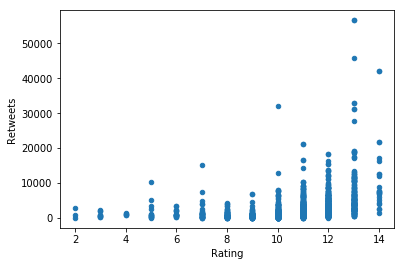

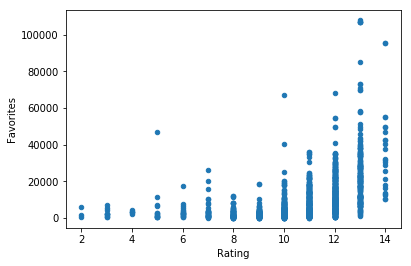

In [49]:
# Looking at the relationships between rating and retweets/favorites
df.plot(x='Rating', y='Retweets', kind='scatter');
df.plot(x='Rating', y='Favorites', kind='scatter');


In [44]:
df.head()

,Tweet ID,Timestamp,Source,Text,URL,Rating,Name,doggo,floofer,pupper,puppo,Image URL,Image Num,Dog Type,Confidence,Retweets,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Unidentifiable,0.000000,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6514,33819
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4328,25461
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,9774,41048
